In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

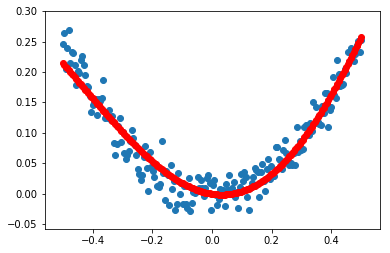

In [20]:
# 使用numpy生成200个随机点
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 定义神经网络中间层
Weights_L1 = tf.Variable(tf.random.normal([1, 10]))
biases_L1 = tf.Variable(tf.random.normal([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义输出层
Weights_L2 = tf.Variable(tf.random.normal([10, 1]))
biases_L2 = tf.Variable(tf.random.normal([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2)
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))

# 使用梯度下降
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

loss_li = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        loss_li.append(sess.run(loss, feed_dict={x: x_data, y: y_data}))
    prediction_value = sess.run(prediction, feed_dict={x: x_data})

    plt.figure()
    plt.scatter(x_data, y_data)
    plt.scatter(x_data, prediction_value, c='red')
    plt.show()

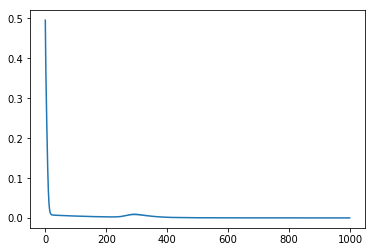

In [21]:
plt.plot([i for i in range(1000)], loss_li)